In [1]:
#多クラス分類
from torchvision.datasets import FashionMNIST
from torchvision import transforms

train = FashionMNIST('FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
test = FashionMNIST('FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

Extracting FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to FashionMNIST\FashionMNIST\raw


Extracting FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to FashionMNIST\FashionMNIST\raw


Extracting FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to FashionMNIST\FashionMNIST\raw


Extracting FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to FashionMNIST\FashionMNIST\raw
Processing...


C:\Users\owner\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [20]:
import torch
#１０種類の画像を分類（判別）できるか
X_train = train.data.type(torch.float32)
t_train = train.targets
X_test = test.data.type(torch.float32)
t_test = test.targets

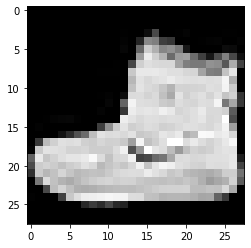

In [11]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')

In [12]:
X_train[0]#28*28の配列

tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   0.,  13.,  73.,   0.,   0.,   1.,   4.,   0.,   0.,   0.,
           0.,   1.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,   0.,  36., 136., 127.,  62.,  54.,   0.,   0.,   0.,   1.,   3.,
           4.,   0.,   0.,   3.],
        [  0.,   0.,

In [21]:
t_train #X_train[0]の配列なら正解は9となる

tensor([9, 0, 0,  ..., 3, 0, 5])

In [22]:
from torch.utils.data import TensorDataset, DataLoader

ds_train = TensorDataset(X_train, t_train)
ds_test = TensorDataset(X_test, t_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

In [23]:
X_train.shape 

torch.Size([60000, 28, 28])

In [24]:
from torch import nn

n_in = 28*28
n_mid = 128
n_out = 10

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(n_in, n_mid),
    nn.Sigmoid(),
    nn.Linear(n_mid, n_out)
)

In [25]:
model(X_train)

tensor([[-0.4237, -0.1674, -0.8751,  ...,  0.1653,  0.6152,  0.7895],
        [-0.1744,  0.0421, -0.5306,  ...,  0.3412,  0.3141,  0.8778],
        [ 0.1035, -0.2449, -0.7750,  ...,  0.4933,  0.1405,  0.9180],
        ...,
        [ 0.0193,  0.0639, -0.5888,  ...,  0.4397,  0.3247,  0.8677],
        [-0.1044,  0.2914, -0.6018,  ...,  0.3503,  0.3211,  0.8146],
        [-0.1886,  0.2703, -0.8232,  ...,  0.8169,  0.4797,  0.7427]],
       grad_fn=<AddmmBackward>)

In [26]:
model(X_train).shape

torch.Size([60000, 10])

In [27]:
#ソフトマックス関数(各値が出力される確率を返す)
from torch.nn import functional as F

F.softmax(model(X_train), dim=1)

tensor([[0.0527, 0.0680, 0.0335,  ..., 0.0949, 0.1488, 0.1771],
        [0.0651, 0.0808, 0.0456,  ..., 0.1090, 0.1061, 0.1864],
        [0.0850, 0.0600, 0.0353,  ..., 0.1255, 0.0882, 0.1919],
        ...,
        [0.0718, 0.0751, 0.0391,  ..., 0.1093, 0.0974, 0.1677],
        [0.0699, 0.1038, 0.0425,  ..., 0.1101, 0.1070, 0.1752],
        [0.0606, 0.0958, 0.0321,  ..., 0.1656, 0.1182, 0.1537]],
       grad_fn=<SoftmaxBackward>)

In [19]:
F.softmax(model(X_train), dim=1).sum(axis=1)

tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
       grad_fn=<SumBackward1>)

In [28]:
t_train

tensor([9, 0, 0,  ..., 3, 0, 5])

In [29]:
#尤度関数
#0.1771*0.0651*0.0850．．．正解の確率を掛け合わせたもの（1に近いほど良い）

#損失関数：E＝-log(L) 交差エントロピー誤差関数

loss_fn = nn.CrossEntropyLoss()

In [30]:
loss_fn(model(X_train), t_train)

tensor(2.3861, grad_fn=<NllLossBackward>)

In [31]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

In [36]:
import numpy as np

for epoch in range(10):
    loss_train = []
    loss_test = []
    train_num = 0
    train_true_num = 0
    test_num = 0
    test_true_num = 0
    
    model.train()
    for X, t in loader_train:
        optimizer.zero_grad()
        y = model(X)
        loss = loss_fn(y, t)
        loss.backward()
        optimizer.step()
        #予測値
        pred = y.argmax(1) #横方向に最大値をとる（縦に取る場合はargmax(0)）
        loss_train.append(loss.tolist())
        train_num +=t.shape[0] #データの長さ
        train_true_num +=(pred==t).sum().item()
        
    model.eval()
    for X, t in loader_train:
        y = model(X)
        loss = loss_fn(y, t)
        #予測値
        pred = y.argmax(1) #横方向に最大値をとる（縦に取る場合はargmax[1]）
        loss_test.append(loss.tolist())
        test_num +=t.shape[0] #データの長さ
        test_true_num +=(pred==t).sum().item()
    
    print('epoch:{}, train:[loss={:.3F},accuracy={:.3F}], test:[loss:{:.3F}, accuracy={:.3F}]'.\
         format(epoch, np.mean(loss_train), train_true_num/train_num, np.mean(loss_test), test_true_num/test_num))

epoch:0, train:[loss=0.899,accuracy=0.712], test:[loss:0.702, accuracy=0.749]
epoch:1, train:[loss=0.709,accuracy=0.741], test:[loss:0.733, accuracy=0.739]
epoch:2, train:[loss=0.702,accuracy=0.746], test:[loss:0.694, accuracy=0.735]
epoch:3, train:[loss=0.664,accuracy=0.755], test:[loss:0.672, accuracy=0.765]
epoch:4, train:[loss=0.648,accuracy=0.763], test:[loss:0.619, accuracy=0.780]
epoch:5, train:[loss=0.645,accuracy=0.764], test:[loss:0.646, accuracy=0.764]
epoch:6, train:[loss=0.637,accuracy=0.769], test:[loss:0.636, accuracy=0.770]
epoch:7, train:[loss=0.630,accuracy=0.766], test:[loss:0.651, accuracy=0.753]
epoch:8, train:[loss=0.632,accuracy=0.769], test:[loss:0.620, accuracy=0.783]
epoch:9, train:[loss=0.617,accuracy=0.776], test:[loss:0.607, accuracy=0.770]
